In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

Задание 1

In [5]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()

In [8]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [13]:
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [14]:
X_test_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.396809,-0.500320,-1.007111,-0.278089,-0.395412,0.141282,0.555916,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.481210
1,-0.400796,1.229499,-0.664391,3.595975,-0.931315,0.623942,-1.275254,0.126565,-0.624360,-0.903989,-0.322703,0.444180,-1.257094
2,-0.395234,-0.500320,2.433163,-0.278089,0.446720,-0.469805,1.081663,-0.911447,-0.624360,1.849573,0.800418,0.369934,0.790338
3,-0.396825,-0.500320,-0.025421,-0.278089,-1.220532,-0.354079,-2.172957,0.694876,-0.624360,-0.596698,0.396095,0.378682,-0.976875
4,0.167084,-0.500320,1.033237,-0.278089,1.331384,-0.026661,0.831307,-0.676503,1.706891,1.578434,0.845343,0.315043,0.677687


In [19]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
print(f'До\t{X_train_scaled.shape}\nПосле\t{X_train_tsne.shape}')

До	(404, 13)
После	(404, 2)


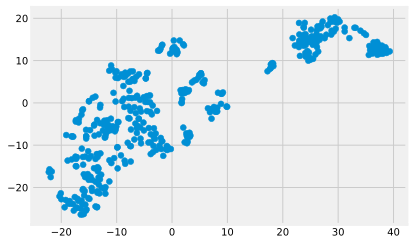

In [20]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

Задание 2

In [22]:
from sklearn.cluster import KMeans

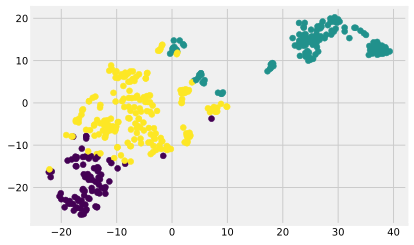

In [23]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [26]:
print(f'Кластер 0:\t{y_train[labels_train == 0].mean()}\nКластер 1:\t{y_train[labels_train == 1].mean()}\nКластер 2:\t{y_train[labels_train == 2].mean()}')

Кластер 0:	27.78837209302326
Кластер 1:	16.165354330708663
Кластер 2:	24.958115183246072


In [28]:
print(f'Кластер 0:\t{X_train.loc[labels_train == 0, "CRIM"].mean()}\nКластер 1:\t{X_train.loc[labels_train == 1, "CRIM"].mean()}\nКластер 2:\t{X_train.loc[labels_train == 2, "CRIM"].mean()}')

Кластер 0:	0.07356558139534886
Кластер 1:	10.797028425196853
Кластер 2:	0.42166020942408367


Задание 3

In [30]:
labels_test = kmeans.predict(X_test_scaled)

In [32]:
print(f'Кластер 0:\t{y_test[labels_test == 0].mean()}\nКластер 1:\t{y_test[labels_test == 1].mean()}\nКластер 2:\t{y_test[labels_test == 2].mean()}')

Кластер 0:	31.35
Кластер 1:	16.43714285714286
Кластер 2:	21.860784313725492


In [33]:
print(f'Кластер 0:\t{X_test.loc[labels_test == 0, "CRIM"].mean()}\nКластер 1:\t{X_test.loc[labels_test == 1, "CRIM"].mean()}\nКластер 2:\t{X_test.loc[labels_test == 2, "CRIM"].mean()}')

Кластер 0:	0.062060000000000004
Кластер 1:	10.165531142857143
Кластер 2:	0.26607882352941176
